# Titanic train 데이터를 통한 예측모형 구축 및 예측

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind

In [209]:
test = pd.read_csv('C:/Users/lsj31/Downloads/titanic/test.csv')
train = pd.read_csv('C:/Users/lsj31/Downloads/titanic/train.csv')

In [210]:
# 호칭(Title)을 추출하여 새로운 열 추가
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 호칭별 나이의 평균을 구함
age_by_title = train.groupby('Title')['Age'].mean()

# 결측값을 호칭별 평균값으로 채우기
train['Age'] = train.apply(
    lambda row: age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

# 불필요한 열 제거
train.drop('Title', axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [211]:
test = pd.read_csv('C:/Users/lsj31/Downloads/titanic/test.csv')
train = pd.read_csv('C:/Users/lsj31/Downloads/titanic/train.csv')
dic = {"male": 0, "female": 1}
dicc = {"S": 0, "C": 1, "Q" : 2}
whole = [train, test]
for dataset in whole:
    dataset['Sex'] = dataset['Sex'].map(dic)
    dataset['Embarked'] = dataset['Embarked'].map(dicc)


In [212]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0


In [213]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [214]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [216]:
numeric_stats = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']].describe()

# 결과 출력
print(numeric_stats)


       PassengerId      Pclass         Age       SibSp       Parch  \
count   891.000000  891.000000  714.000000  891.000000  891.000000   
mean    446.000000    2.308642   29.699118    0.523008    0.381594   
std     257.353842    0.836071   14.526497    1.102743    0.806057   
min       1.000000    1.000000    0.420000    0.000000    0.000000   
25%     223.500000    2.000000   20.125000    0.000000    0.000000   
50%     446.000000    3.000000   28.000000    0.000000    0.000000   
75%     668.500000    3.000000   38.000000    1.000000    0.000000   
max     891.000000    3.000000   80.000000    8.000000    6.000000   

             Fare         Sex  
count  891.000000  891.000000  
mean    32.204208    0.352413  
std     49.693429    0.477990  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000  


In [217]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

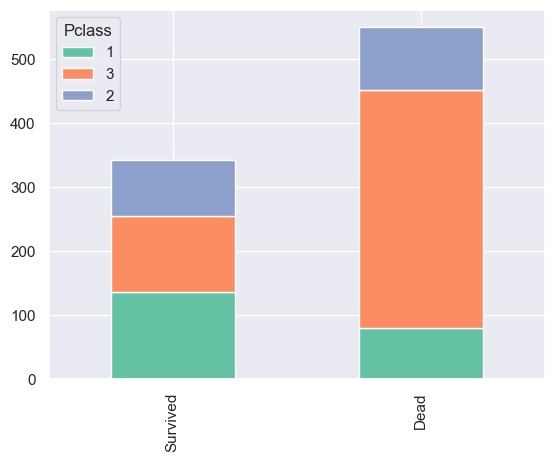

In [218]:
chart(train, 'Pclass')

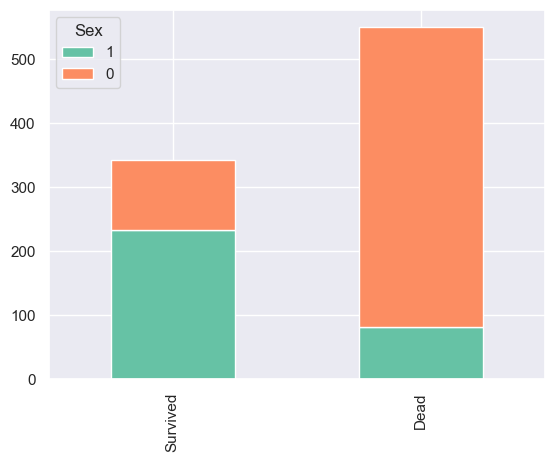

In [219]:
chart(train, 'Sex')

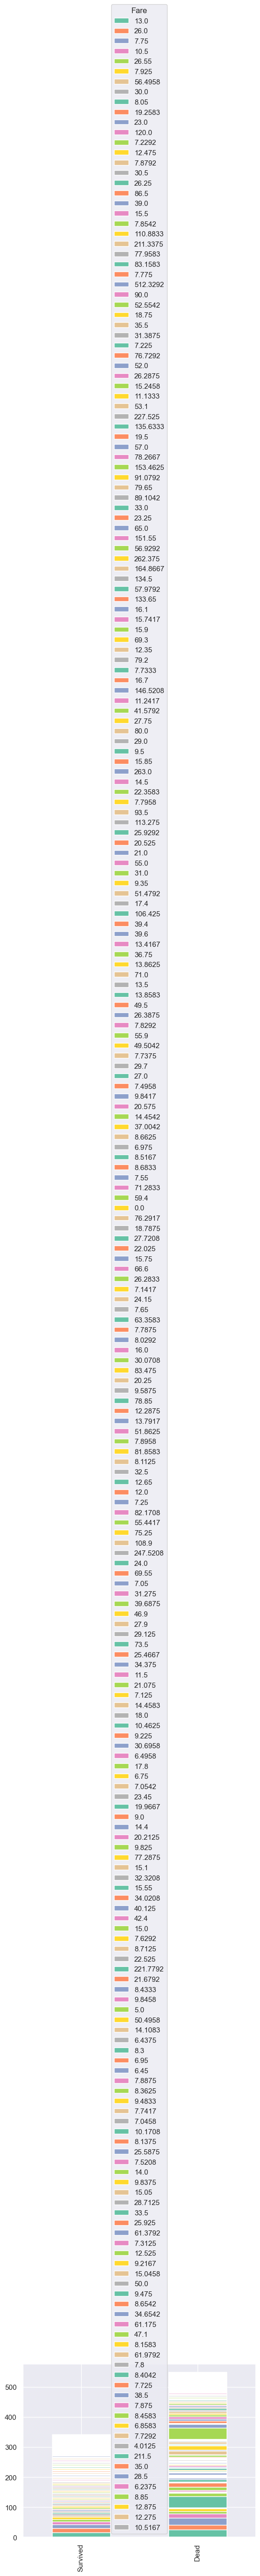

In [220]:
chart(train, 'Fare')

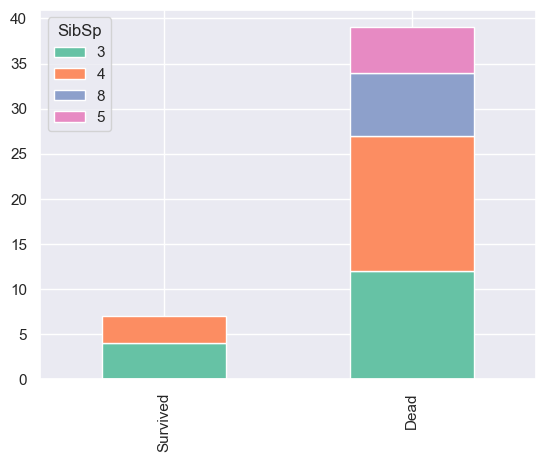

In [221]:
temp = train[(train['SibSp'] > 2)]
chart(temp, 'SibSp')

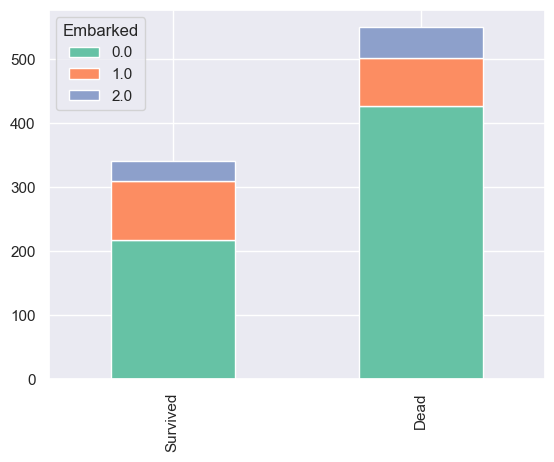

In [222]:
chart(train, 'Embarked')

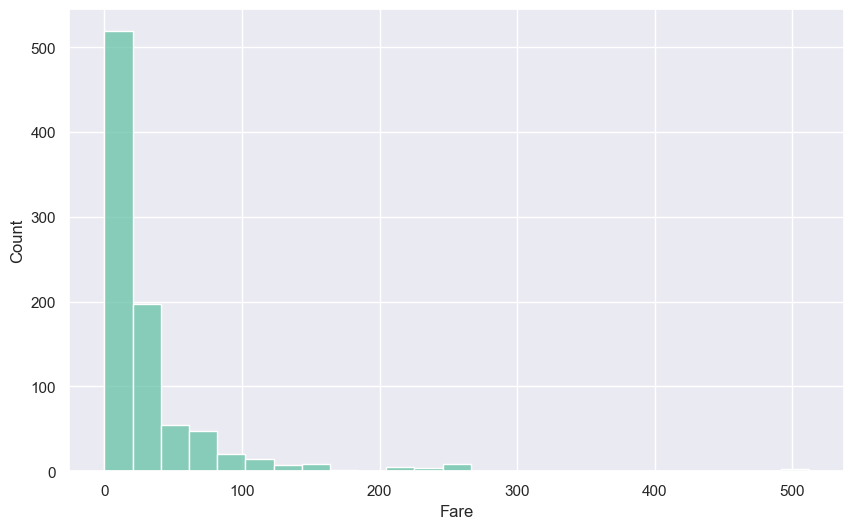

In [223]:
	
fig, ax = plt.subplots(figsize=(10,6))
 
sns.histplot(train['Fare'], bins=25, ax=ax)
 
plt.show()

C:\Users\lsj31\Downloads\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsj31\Downloads\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsj31\Downloads\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsj31\Downloads\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsj31\Downloads\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print

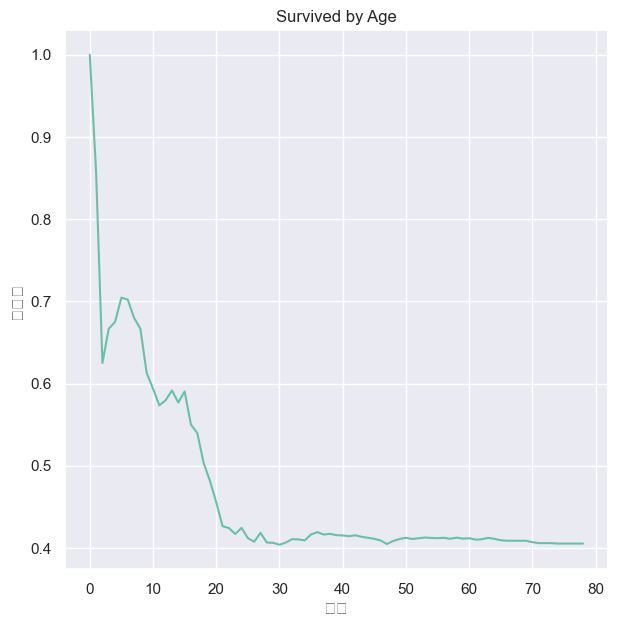

In [224]:

age_range_survival_ratio = []
 
# 1살 부터 생존율 구하기
for i in range(1,80):
    age_range_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
 
plt.figure(figsize=(7,7))
plt.plot(age_range_survival_ratio)
plt.title('Survived by Age')
plt.ylabel('생존율')
plt.xlabel('나이')
 
plt.show()

In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


C:\Users\lsj31\AppData\Local\Temp\ipykernel_38400\3680986622.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'], bins=25, ax=ax)


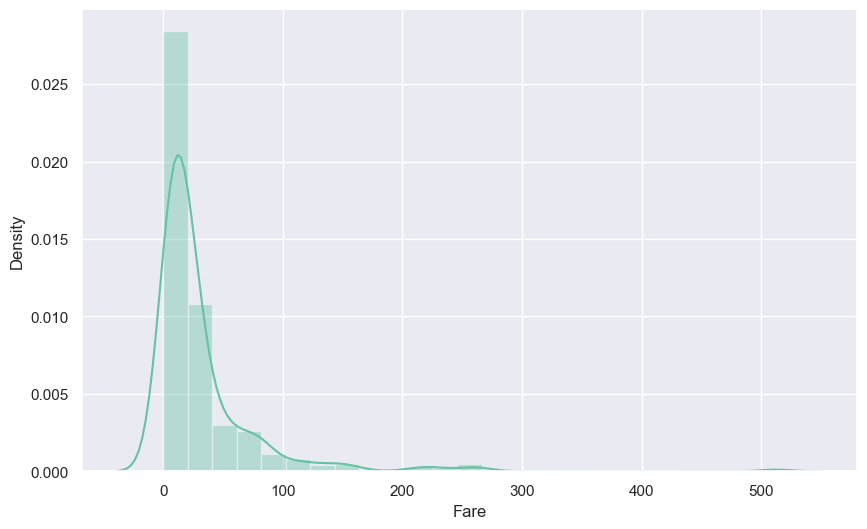

In [226]:
	
fig, ax = plt.subplots(figsize=(10,6))
 
# 분포확인
sns.distplot(train['Fare'], bins=25, ax=ax)
 
plt.show()

In [227]:
# 호칭(Title)을 추출하여 새로운 열 추가
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 호칭별 나이의 평균을 구함
age_by_title = train.groupby('Title')['Age'].mean()

# 결측값을 호칭별 평균값으로 채우기
train['Age'] = train.apply(
    lambda row: age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

# 불필요한 열 제거
train.drop('Title', axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [228]:
train.drop('Name', axis=1, inplace=True)

In [229]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [230]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


Chi-square Statistic: 102.88898875696056
P-value: 4.549251711298793e-23


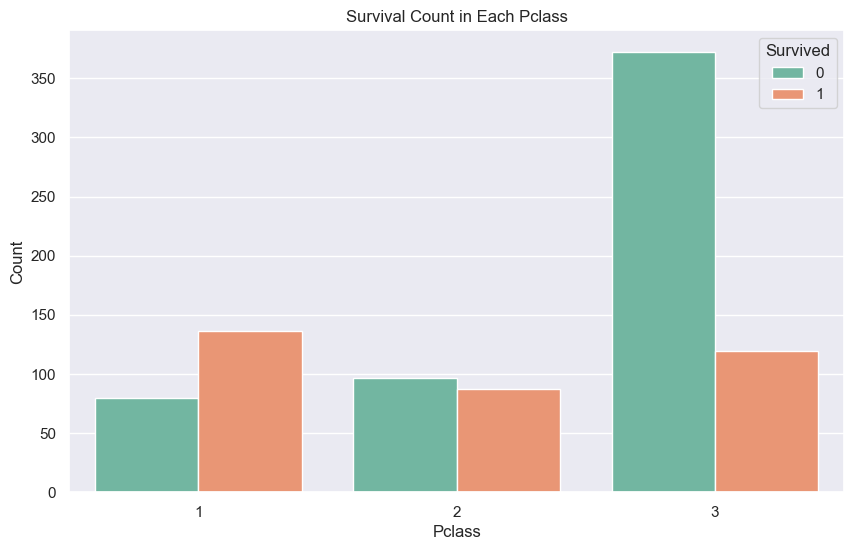

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Bar plot for 'Pclass' and 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count in Each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

# Chi-square test for independence
cross_tab = pd.crosstab(train['Pclass'], train['Survived'])
chi2, p_value, _, _ = chi2_contingency(cross_tab)

# Print the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Show the plot
plt.show()


In [232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [233]:
# 'Embarked'와 'Sex' 열을 삭제하고 기존 DataFrame을 수정
train.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)

# 수정된 DataFrame 확인
print(train.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       0.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       0.0
3         1       1    1  35.0      1      0  53.1000       0.0
4         0       3    0  35.0      0      0   8.0500       0.0


In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [236]:
train.dropna(inplace=True)

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [238]:

from sklearn.model_selection import train_test_split	
# 분석 모델 가져오기
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
 
# 분석 성능을 측정할 도구
from sklearn import metrics

In [239]:

# Train, Test, Target을 분리
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values
 
# train_test_split 을 사용해 7:3의 비율로 train set과 validation set을 생성
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=1230, shuffle=True)

In [240]:
# train이 NaN 값을 가진 DataFrame이고 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' 등의 열을 포함한다고 가정합니다.

# NaN 값을 확인
nan_values = train.isna().sum()

# NaN 값을 출력
print("NaN 값 확인:")
print(nan_values)


NaN 값 확인:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [241]:
# Model 적용
model = KNeighborsClassifier()
model.fit(X_tr, y_tr)
 
#예측
prediction1 = model.predict(X_vid)
 
#예측값으로 accuracy 측정
print('K-Nearest Neighbors - {:.2f}% 확률로 생존 맞춤'.format(metrics.accuracy_score(prediction1, y_vid) * 100))


K-Nearest Neighbors - 68.54% 확률로 생존 맞춤


In [242]:

model = DecisionTreeClassifier()
model.fit(X_tr, y_tr)
 
#예측
prediction2 = model.predict(X_vid)
 
#예측값으로 accuracy 측정
print('Decision Tree - {:.2f}% 확률로 생존 맞춤'.format(metrics.accuracy_score(prediction2, y_vid) * 100))

Decision Tree - 73.78% 확률로 생존 맞춤


In [243]:

model = RandomForestClassifier()
model.fit(X_tr, y_tr)
 
#예측
prediction3 = model.predict(X_vid)
 
#예측값으로 accuracy 측정
print('Random Forest - {:.2f}% 확률로 생존 맞춤'.format(metrics.accuracy_score(prediction3, y_vid) * 100))


Random Forest - 78.65% 확률로 생존 맞춤


In [244]:

model = GaussianNB()
model.fit(X_tr, y_tr)
 
#예측
prediction4 = model.predict(X_vid)
 
#예측값으로 accuracy 측정
print('Naive Bayes - {:.2f}% 확률로 생존 맞춤'.format(metrics.accuracy_score(prediction4, y_vid) * 100))


Naive Bayes - 78.28% 확률로 생존 맞춤


In [245]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [246]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=False)
# Model 의 결과를 담을 List 생성
mean = []

# Model 의 결과를 담을 List 생성
mean = []
accuracy = []
std = []
 
# 사용할 Model 명
classifiers = ['K-Nearest Neighbors(K-NN)',
               'Decision Tree',
               'Random Forest',
               'Naive Bayes']
 
# 사용할 Model 설정
models = [KNeighborsClassifier(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          GaussianNB()]

In [247]:

for i in models:
    model = i
    cv_result = cross_val_score(model, X_train, target_label, cv = kfold, scoring='accuracy')
    cv_result = cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    
# Model 별 accuracy 평균과 표준편차
kfold_models_dataframe = pd.DataFrame({'CV mean':mean, 'Std':std}, index=classifiers)
kfold_models_dataframe

,CV mean,Std
K-Nearest Neighbors(K-NN),0.700907,0.049070
Decision Tree,0.770608,0.035953
Random Forest,0.806601,0.040832
Naive Bayes,0.785163,0.022043


In [248]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [249]:
# 호칭(Title)을 추출하여 새로운 열 추가
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 호칭별 나이의 평균을 구함
age_by_title = test.groupby('Title')['Age'].mean()

# 결측값을 호칭별 평균값으로 채우기
test['Age'] = train.apply(
    lambda row: age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

# 불필요한 열 제거
test.drop('Title', axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          417 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [250]:
test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

# 수정된 DataFrame 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [251]:
# train이 NaN 값을 가진 DataFrame이고 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' 등의 열을 포함한다고 가정합니다.

# NaN 값을 확인
nan_values = test.isna().sum()

# NaN 값을 출력
print("NaN 값 확인:")
print(nan_values)


NaN 값 확인:
Pclass      0
Sex         0
Age         1
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [252]:
# 'Age'와 'Fare' 열의 결측값을 각각 평균값으로 대체
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [253]:
# train이 NaN 값을 가진 DataFrame이고 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' 등의 열을 포함한다고 가정합니다.

# NaN 값을 확인
nan_values = test.isna().sum()

# NaN 값을 출력
print("NaN 값 확인:")
print(nan_values)


NaN 값 확인:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [262]:
clf = GaussianNB()
clf.fit(X_train, target_label)
prediction_LG = clf.predict(test)


C:\Users\lsj31\Downloads\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [255]:
	
# 제출에 Submission 파일 불러오기
submission = pd.read_csv('C:\\Users\\lsj31\\Downloads\\titanic\\gender_submission.csv')

# 예측값 업데이트
submission['Survived'] = prediction_LG
 
# CSV 파일로 제작
submission.to_csv('titanic_submission.csv', index=False)